In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Baseline - singles

In [2]:
cases = ['SZ',
        'ASD',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

In [3]:
logs = os.listdir('logs')
results = []
for case in cases:
    for l in logs:
        if l[-(4+len(case)):-4] == case:
            results.append(pd.read_csv(os.path.join('logs',l),header=[0,1],index_col=0))

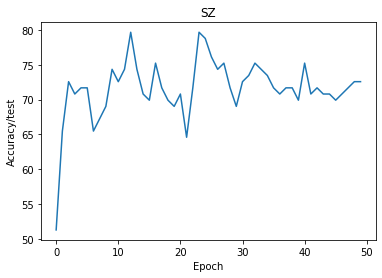

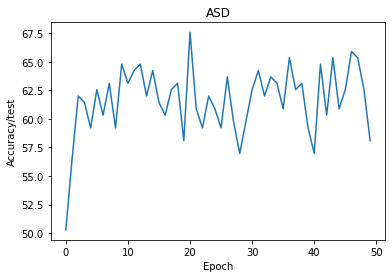

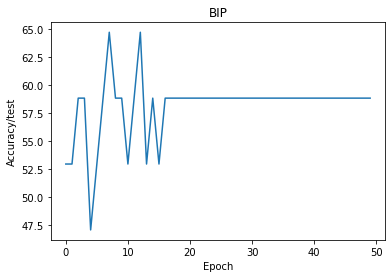

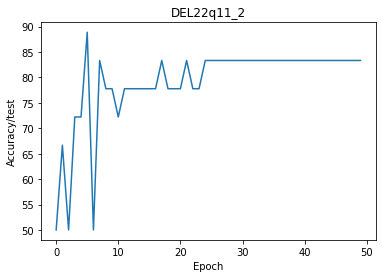

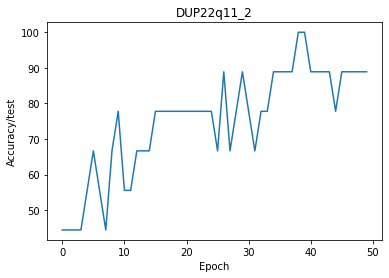

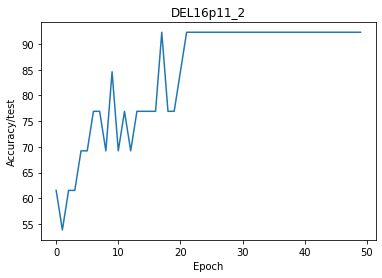

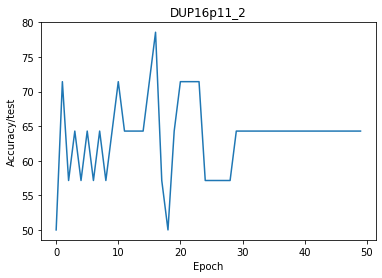

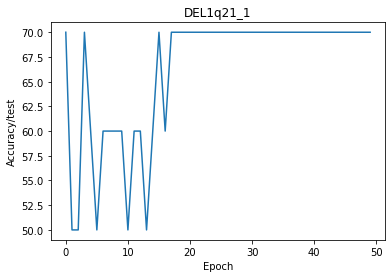

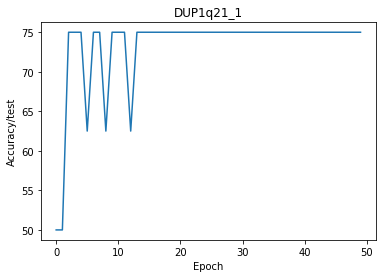

In [6]:
for case,df in zip(cases,results):
    sns.lineplot(x=df.index,y=df[case]['Accuracy/test'])
    plt.title(case)
    plt.xlabel('Epoch')
    plt.show()

# MTL - doubles

In [7]:
bigs = ['SZ',
        #'ASD',
        'BIP'
        ]

smalls = ['DEL22q11_2',
        'DUP22q11_2',
        #'DEL16p11_2',
        #'DUP16p11_2',
        #'DEL1q21_1',
        #'DUP1q21_1'
        ]

In [8]:
pairs = []
pair_results = []
for big in bigs:
    for small in smalls:
        for l in os.listdir('logs'):
            if (big in l) and (small in l):
                pairs.append((big,small))
                pair_results.append(pd.read_csv(os.path.join('logs',l),header=[0,1],index_col=0))

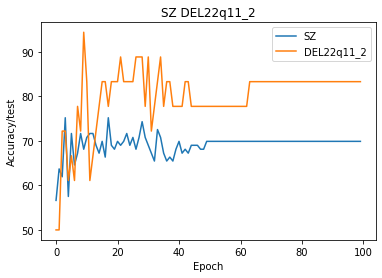

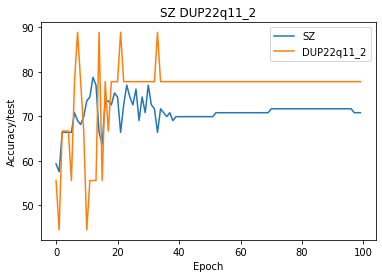

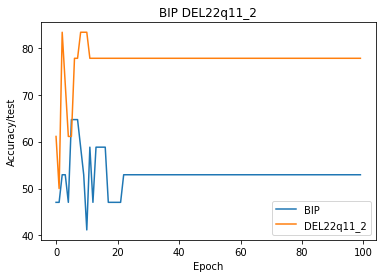

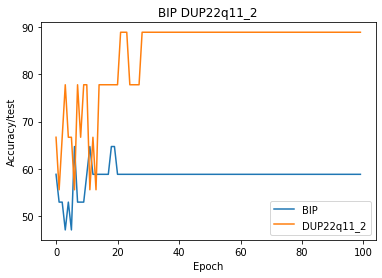

In [13]:
for pair,df in zip(pairs,pair_results):
    big = pair[0]
    small = pair[1]

    sns.lineplot(x=df.index,y=df[big]['Accuracy/test'],label=big)
    sns.lineplot(x=df.index,y=df[small]['Accuracy/test'],label=small)

    plt.title(f"{big} {small}")
    plt.xlabel('Epoch')
    plt.show()